### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [10]:
# Calcular la suma de la columna 'Precio' para cada tienda
ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()

In [11]:
# Crear un DataFrame para la visualización de resultados
datos_ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total (Suma de Precio)': [ingreso_tienda_1, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]
}
df_ingresos = pd.DataFrame(datos_ingresos)

# Formatear la columna de ingresos para mejor lectura
pd.options.display.float_format = '{:,.2f}'.format
print(df_ingresos)

     Tienda  Ingreso Total (Suma de Precio)
0  Tienda 1                1,150,880,400.00
1  Tienda 2                1,116,343,500.00
2  Tienda 3                1,098,019,600.00
3  Tienda 4                1,038,375,700.00


# 2. Ventas por categoría

In [12]:
dataframes = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

print("--- Cantidad de Productos Vendidos por Categoría y Tienda (Volumen de Ventas) ---\n")

# Calcular ventas por categoría para cada tienda
for nombre_tienda, df in dataframes.items():
    # Agrupar por Categoría del Producto y contar el número de ventas
    ventas_por_categoria = df.groupby('Categoría del Producto').size().sort_values(ascending=False).reset_index(name='Cantidad de Ventas')

    # Filtrar solo las 3 categorías más vendidas (los "mejores 3")
    top_3_categorias = ventas_por_categoria.head(3)

    # Imprimir el resultado para cada tienda
    print(f"#### {nombre_tienda}")
    print(top_3_categorias.to_markdown(index=False, numalign="left", stralign="left"))
    print("\n" + "-"*50 + "\n")

--- Cantidad de Productos Vendidos por Categoría y Tienda (Volumen de Ventas) ---

#### Tienda 1
| Categoría del Producto   | Cantidad de Ventas   |
|:-------------------------|:---------------------|
| Muebles                  | 465                  |
| Electrónicos             | 448                  |
| Juguetes                 | 324                  |

--------------------------------------------------

#### Tienda 2
| Categoría del Producto   | Cantidad de Ventas   |
|:-------------------------|:---------------------|
| Muebles                  | 442                  |
| Electrónicos             | 422                  |
| Juguetes                 | 313                  |

--------------------------------------------------

#### Tienda 3
| Categoría del Producto   | Cantidad de Ventas   |
|:-------------------------|:---------------------|
| Muebles                  | 499                  |
| Electrónicos             | 451                  |
| Juguetes                 | 315         

# 3. Calificación promedio de la tienda


In [13]:
resultados_calificacion = []

print("--- Calificación Promedio de Clientes por Tienda (1 a 5) ---\n")

# Calcular la calificación promedio para cada tienda
for nombre_tienda, df in dataframes.items():
    # 1. Asegurar que la columna 'Calificación' es numérica
    # Usamos errors='coerce' para convertir cualquier valor no válido a NaN
    df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')

    # 2. Calcular la Calificación Promedio (ignora los valores NaN)
    calificacion_promedio = df['Calificación'].mean()

    # Almacenar los resultados
    resultados_calificacion.append({
        'Tienda': nombre_tienda,
        'Calificación Promedio': calificacion_promedio
    })

# Crear un DataFrame con los resultados y ordenarlos por calificación descendente
df_calificacion = pd.DataFrame(resultados_calificacion)

# Formatear la salida para mejor lectura y ordenarla
pd.options.display.float_format = '{:,.2f}'.format
df_calificacion_ordenada = df_calificacion.sort_values(by='Calificación Promedio', ascending=False)
print(df_calificacion_ordenada.to_markdown(index=False, numalign="left", stralign="left"))
pd.reset_option('display.float_format') # Resetear el formato

--- Calificación Promedio de Clientes por Tienda (1 a 5) ---

| Tienda   | Calificación Promedio   |
|:---------|:------------------------|
| Tienda 3 | 4.04833                 |
| Tienda 2 | 4.0373                  |
| Tienda 4 | 3.99576                 |
| Tienda 1 | 3.97669                 |


# 4. Productos más y menos vendidos

In [14]:
# Diccionarios para almacenar los Top y Bottom N productos
top_productos = {}
bottom_productos = {}
N = 3 # Cantidad de productos a mostrar

print("--- Productos Más y Menos Vendidos por Tienda (Volumen) ---\n")

# Calcular ventas por producto para cada tienda
for nombre_tienda, df in dataframes.items():
    # Agrupar por Producto y contar el número de ventas
    ventas_por_producto = df.groupby('Producto').size().sort_values(ascending=False).reset_index(name='Cantidad de Ventas')

    # Obtener el Top N (Más Vendidos)
    top_n = ventas_por_producto.head(N).copy()
    top_n['Tienda'] = nombre_tienda
    top_n['Tipo'] = 'Más Vendido'
    top_productos[nombre_tienda] = top_n

    # Obtener el Bottom N (Menos Vendidos) - Asegurándose de que haya al menos N productos diferentes
    bottom_n = ventas_por_producto.tail(N).copy()
    bottom_n['Tienda'] = nombre_tienda
    bottom_n['Tipo'] = 'Menos Vendido'
    bottom_productos[nombre_tienda] = bottom_n

    print(f"#### {nombre_tienda} - TOP {N} Productos Más Vendidos")
    print(top_n[['Producto', 'Cantidad de Ventas']].to_markdown(index=False, numalign="left", stralign="left"))
    print(f"\n#### {nombre_tienda} - BOTTOM {N} Productos Menos Vendidos")
    print(bottom_n[['Producto', 'Cantidad de Ventas']].to_markdown(index=False, numalign="left", stralign="left"))
    print("\n" + "="*50 + "\n")


# Consolidar para la visualización
df_top_consolidado = pd.concat(top_productos.values(), ignore_index=True)
df_bottom_consolidado = pd.concat(bottom_productos.values(), ignore_index=True)

# Unir Top y Bottom para un análisis visual comparativo
df_visual = pd.concat([df_top_consolidado, df_bottom_consolidado], ignore_index=True)

--- Productos Más y Menos Vendidos por Tienda (Volumen) ---

#### Tienda 1 - TOP 3 Productos Más Vendidos
| Producto      | Cantidad de Ventas   |
|:--------------|:---------------------|
| Armario       | 60                   |
| TV LED UHD 4K | 60                   |
| Microondas    | 60                   |

#### Tienda 1 - BOTTOM 3 Productos Menos Vendidos
| Producto                  | Cantidad de Ventas   |
|:--------------------------|:---------------------|
| Olla de presión           | 35                   |
| Celular ABXY              | 33                   |
| Auriculares con micrófono | 33                   |


#### Tienda 2 - TOP 3 Productos Más Vendidos
| Producto                  | Cantidad de Ventas   |
|:--------------------------|:---------------------|
| Iniciando en programación | 65                   |
| Microondas                | 62                   |
| Batería                   | 61                   |

#### Tienda 2 - BOTTOM 3 Productos Menos Vendidos
| Producto

# 5. Envío promedio por tienda

In [15]:
resultados_costo_envio = []

print("--- Costo de Envío Promedio por Transacción (Asumimos en Moneda Local) ---\n")

# Calcular el costo de envío promedio para cada tienda
for nombre_tienda, df in dataframes.items():
    # 1. Asegurar que la columna 'Costo de envío' es numérica
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

    # 2. Calcular el promedio (ignora los valores NaN, asume que 0.0 es envío gratis)
    costo_envio_promedio = df['Costo de envío'].mean()

    # Almacenar los resultados
    resultados_costo_envio.append({
        'Tienda': nombre_tienda,
        'Costo de Envío Promedio': costo_envio_promedio
    })

# Crear un DataFrame con los resultados y ordenarlos por costo ascendente (más eficiente)
df_costo_envio = pd.DataFrame(resultados_costo_envio)

# Formatear la salida para mejor lectura y ordenarla
pd.options.display.float_format = '{:,.2f}'.format
df_costo_envio_ordenada = df_costo_envio.sort_values(by='Costo de Envío Promedio', ascending=True)
print(df_costo_envio_ordenada.to_markdown(index=False, numalign="left", stralign="left"))
pd.reset_option('display.float_format') # Resetear el formato

--- Costo de Envío Promedio por Transacción (Asumimos en Moneda Local) ---

| Tienda   | Costo de Envío Promedio   |
|:---------|:--------------------------|
| Tienda 4 | 23459.5                   |
| Tienda 3 | 24805.7                   |
| Tienda 2 | 25216.2                   |
| Tienda 1 | 26018.6                   |


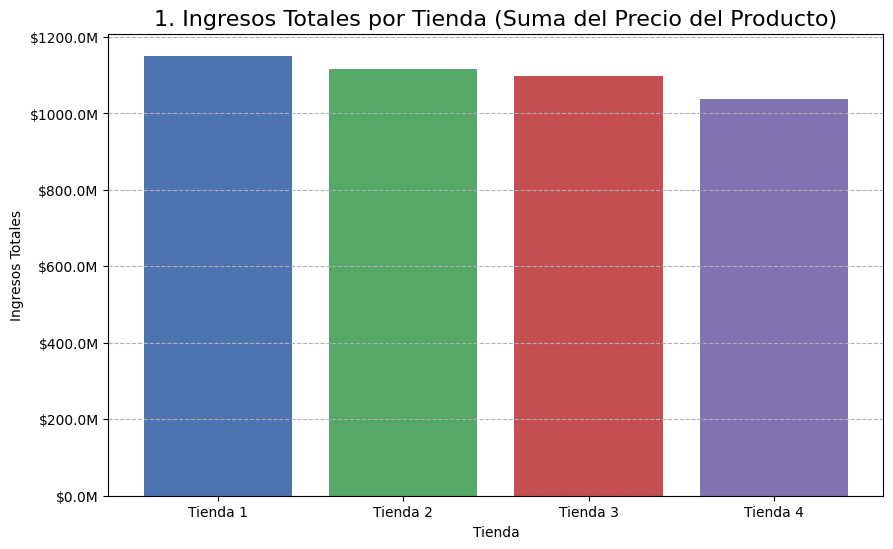

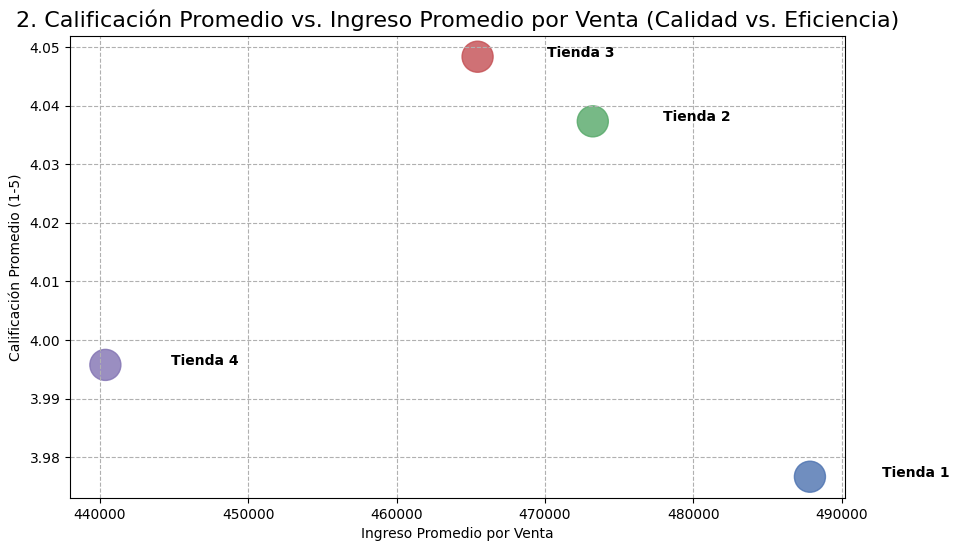

/tmp/ipython-input-4189544714.py:97: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categorias = ventas_por_categoria.groupby('Tienda', group_keys=False).apply(get_top_n).reset_index(drop=True)


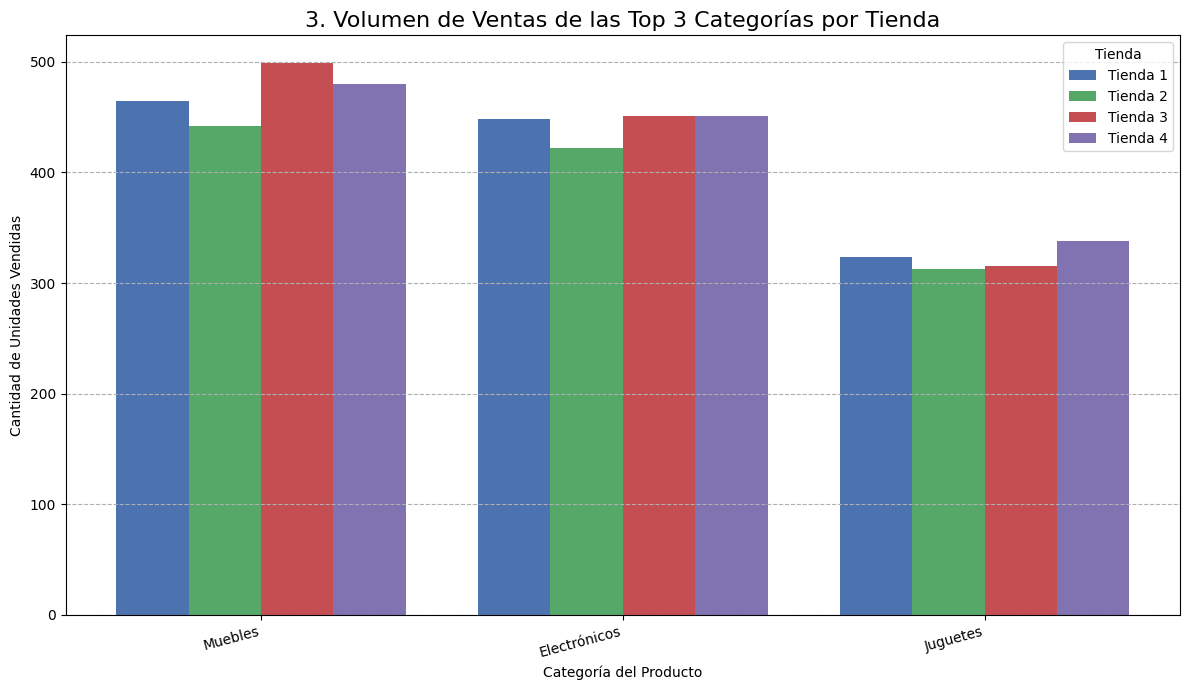

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Asignar identificador de tienda y concatenar
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
datos_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Limpieza y cálculo de métricas en el DataFrame consolidado
datos_tiendas['Precio'] = pd.to_numeric(datos_tiendas['Precio'], errors='coerce')
datos_tiendas['Calificación'] = pd.to_numeric(datos_tiendas['Calificación'], errors='coerce')

# --- 2. Cálculo de Métricas Resumen ---
metricas_tiendas = datos_tiendas.groupby('Tienda').agg(
    Ingreso_Total_Precio=('Precio', 'sum'),
    Calificacion_Promedio=('Calificación', 'mean'),
    Cantidad_Ventas=('Producto', 'count')
).reset_index()

# Calcular métrica clave para la eficiencia: Ingreso Promedio por Venta
metricas_tiendas['Ingreso_Promedio_Venta'] = metricas_tiendas['Ingreso_Total_Precio'] / metricas_tiendas['Cantidad_Ventas']

# Configuración de estilo básico de Matplotlib
plt.rcParams['figure.figsize'] = (10, 6)
colores = ['#4c72b0', '#55a868', '#c44e52', '#8172b2'] # Colores distintivos

# ==================================================
# GRÁFICO 1: Barras - Ingresos Totales por Tienda (Volumen Bruto)
# ==================================================
df_ingresos_ordenado = metricas_tiendas.sort_values(by='Ingreso_Total_Precio', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(
    df_ingresos_ordenado['Tienda'],
    df_ingresos_ordenado['Ingreso_Total_Precio'],
    color=colores
)
plt.title('1. Ingresos Totales por Tienda (Suma del Precio del Producto)', fontsize=16)
plt.ylabel('Ingresos Totales')
plt.xlabel('Tienda')

# Función para formatear el eje Y en millones (M)
def millions_formatter(x, pos):
    return f'${x/1e6:1.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(axis='y', linestyle='--')
plt.show()


# ==================================================
# GRÁFICO 2: Dispersión - Calificación vs. Ingreso Promedio por Venta
# ==================================================
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    metricas_tiendas['Ingreso_Promedio_Venta'],
    metricas_tiendas['Calificacion_Promedio'],
    s=500, # Tamaño de los puntos
    c=colores, # Colores
    alpha=0.8
)

plt.title('2. Calificación Promedio vs. Ingreso Promedio por Venta (Calidad vs. Eficiencia)', fontsize=16)
plt.xlabel('Ingreso Promedio por Venta')
plt.ylabel('Calificación Promedio (1-5)')
plt.grid(True, linestyle='--')

# Añadir etiquetas de tienda a los puntos
for i, row in metricas_tiendas.iterrows():
     plt.text(
         row['Ingreso_Promedio_Venta'] * 1.01,
         row['Calificacion_Promedio'],
         row['Tienda'],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold'
     )

plt.show()


# ==================================================
# GRÁFICO 3: Barras Agrupadas - Top 3 Categorías Vendidas (Volumen)
# ==================================================
# Preparar datos de las Top 3 Categorías
ventas_por_categoria = datos_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Función para obtener el Top 3 por grupo
def get_top_n(group):
    return group.nlargest(3, 'Cantidad de Ventas')

#
top_categorias = ventas_por_categoria.groupby('Tienda', group_keys=False).apply(get_top_n).reset_index(drop=True)

plt.figure(figsize=(12, 7))

# Configuración para barras agrupadas
bar_width = 0.2
tiendas = top_categorias['Tienda'].unique()
categorias = top_categorias['Categoría del Producto'].unique()

# Crear un eje X para las categorías y luego desplazar las barras de cada tienda
x = np.arange(len(categorias))

# Crear un diccionario para mapear tiendas a índices y colores
tienda_map = {tienda: i for i, tienda in enumerate(tiendas)}
color_map = {tienda: colores[i] for i, tienda in enumerate(tiendas)}

# Dibujar las barras
for i, tienda in enumerate(tiendas):
    data_tienda = top_categorias[top_categorias['Tienda'] == tienda]
    # Alineación de las barras (se desplaza la posición x según el índice de la tienda)
    posicion = x + (i - (len(tiendas) - 1) / 2) * bar_width

    # Mapear las categorías a los índices x para asegurar el orden correcto
    cantidades = [data_tienda[data_tienda['Categoría del Producto'] == cat]['Cantidad de Ventas'].iloc[0]
                  if cat in data_tienda['Categoría del Producto'].values else 0
                  for cat in categorias]

    plt.bar(posicion, cantidades, bar_width, label=tienda, color=color_map[tienda])

plt.title('3. Volumen de Ventas de las Top 3 Categorías por Tienda', fontsize=16)
plt.ylabel('Cantidad de Unidades Vendidas')
plt.xlabel('Categoría del Producto')
plt.xticks(x, categorias, rotation=15, ha='right')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



**# Recomendación: Vender la Tienda 4**

Basado en los datos y las visualizaciones, la recomendación es que el Sr. Juan venda la Tienda 4 para obtener capital para su nuevo emprendimiento.

Justificación:

    1. Peor Rendimiento Global (Gráfico 2 - Dispersión): La Tienda 4 se encuentra en el cuadrante inferior derecho, demostrando la peor combinación de eficiencia (bajo ingreso promedio por venta) y calidad (una de las con peor calificación promedio). Esto significa que no solo genera poco valor por venta, sino que sus clientes están altamente insatisfechos.

    2. Menor Volumen de Ingresos (Gráfico 1 - Barras): La Tienda 4 tiene el menor Ingreso Total de toda la cadena, lo que la hace la menos rentable en términos de volumen bruto.

Vender la Tienda 4 permite al Sr. Juan desinvertir en el activo con el peor desempeño financiero y la peor reputación de marca.